In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

phy_train=pd.read_csv('PHY_TRAIN.csv')
phy_train

,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
0,1,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,-1,-0.036906,-0.000724,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1,2,0,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0.000000,0,...,-1,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1,1,0.302235,0.950770
2,3,1,0.868397,0.178202,0.150828,-1,0.000000,0.0,0.000000,0,...,1,0.908824,0.550843,0.868397,0.178202,0.150828,-1,1,0.001421,0.882853
3,4,0,0.000000,0.000000,0.000000,0,1.577894,0.0,-0.369792,-1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
4,5,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,1,0.000005,0.400702,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49996,49997,1,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49997,49998,1,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.918590,1.012605,-0.047045,-1,1,0.014583,0.850662
49998,49999,1,0.000000,0.000000,0.000000,0,0.855551,0.0,-0.849437,1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000


In [2]:
null_columns=phy_train.columns[phy_train.isnull().any()]
null_columns

Index(['feat20', 'feat21', 'feat22', 'feat29', 'feat44', 'feat45', 'feat46',
       'feat55'],
      dtype='object')

In [3]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
idf=pd.DataFrame(imp.fit_transform(phy_train))

idf.columns=phy_train.columns
idf.index=phy_train.index
null_columns=idf.columns[idf.isnull().any()]
null_columns

Index([], dtype='object')

In [10]:
X=idf.iloc[:,2:]
y=idf.target

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [12]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred=model.predict(X_test)

True Positive Rate:  0.7031496062992126
False Positive Rate:  0.29471544715447157
Accuracy: 0.7042
Precision: 0.7052845528455285
Recall: 0.6970670952189635


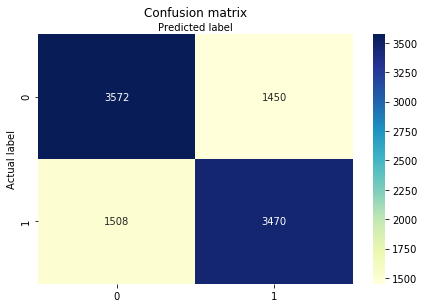

In [14]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print("True Positive Rate: ",TPR)
print("False Positive Rate: ", FPR)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

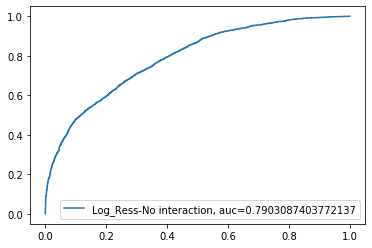

In [17]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Log.Ress-No interaction, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
stdev = np.sqrt(sum((model.predict(X_train) - y_train)**2) / (len(y_train) - 2))

stdev

0.5370888410879163

In [19]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2958
Mean Squared Error: 0.2958
Root Mean Squared Error: 0.5438749856354859


In [23]:
print(phy_train.skew())

exampleid   -2.411087e-17
target       1.112051e-02
feat1        2.826244e+00
feat2        4.424666e+00
feat3       -1.562475e+00
                 ...     
feat74      -1.419218e+00
feat75      -4.153340e-02
feat76       3.464927e+00
feat77       1.211273e+01
feat78       3.223882e+00
Length: 80, dtype: float64


In [21]:
print(model.coef_)

[[ 3.45516092e-02  8.95232066e-03  1.73473081e-02  1.77329227e+00
  -6.99265997e-03 -4.70038475e-02 -1.05207672e-01  7.90539665e-01
   2.99317271e-02  7.06272368e-03  1.98415092e-02 -7.19293466e-02
   1.41023000e+00  1.47165876e+00  1.37431857e+00 -5.89701382e-03
  -5.54184566e-02  9.94964495e-02 -6.30070889e-03  3.32930609e-01
  -1.37259440e-02 -8.59385050e-03  1.54481226e-02  5.81456243e-03
  -3.64340232e-02  8.05155241e-02 -1.53266208e-01  9.01045231e-02
   0.00000000e+00 -2.82817130e-02 -1.91068171e-01  1.83222353e-05
  -2.67435402e-03  5.48697601e-02  8.77085364e-02  9.37902937e-03
  -1.12157883e-02  4.19042807e-03 -5.79712981e-02 -1.18373547e+00
  -3.43855684e-01  3.29901090e-01 -6.79570063e-03 -2.40822360e-02
  -5.16231036e-02 -1.66587031e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.52172208e-04
  -3.67374823e-01 -2.05754139e-01  0.00000000e+00 -1.12708609e-01
  -3.07172763e-05  6.99823018e-03  3.40934776e-01 -2.94658167e-02
   7.37149

In [25]:
phy_train.T

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
exampleid,1.0,2.000000,3.000000,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,49991.0,49992.0,49993.0,49994.0,49995.0,49996.0,49997.0,49998.000000,49999.0,50000.0
target,0.0,0.000000,1.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.0
feat1,0.0,0.920167,0.868397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.918590,0.0,0.0
feat2,0.0,0.817883,0.178202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.012605,0.0,0.0
feat3,0.0,-0.646473,0.150828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.047045,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat74,0.0,-0.646473,0.150828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.047045,0.0,0.0
feat75,0.0,-1.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,0.0,0.0
feat76,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
feat77,0.0,0.302235,0.001421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014583,0.0,0.0


In [30]:
pd.set_option('display.max_rows', 100)

In [41]:
phy_stats= phy_train.describe().T
phy_skew= phy_train.skew()
phy_stats.insert(8, 'Skew',phy_skew, True)

phy_stats

,count,mean,std,min,25%,50%,75%,max,Skew
exampleid,50000.0,25000.500000,14433.901067,1.000000,12500.750000,2.500050e+04,3.750025e+04,50000.000000,-2.411087e-17
target,50000.0,0.497220,0.499997,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000,1.112051e-02
feat1,50000.0,0.155606,0.414875,0.000000,0.000000,0.000000e+00,0.000000e+00,2.639020,2.826244e+00
feat2,50000.0,0.084876,0.295335,0.000000,0.000000,0.000000e+00,0.000000e+00,3.429590,4.424666e+00
feat3,50000.0,-0.050354,0.253748,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.999954,-1.562475e+00
feat4,50000.0,-0.000060,0.392916,-1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,-5.310541e-04
feat5,50000.0,0.126569,0.400694,0.000000,0.000000,0.000000e+00,0.000000e+00,2.719006,3.245044e+00
feat6,50000.0,0.049887,0.223713,0.000000,0.000000,0.000000e+00,0.000000e+00,3.054644,5.761064e+00
feat7,50000.0,-0.038344,0.214168,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.999274,-2.226074e+00
feat8,50000.0,0.002860,0.322077,-1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,5.896603e-02
